In [4]:
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Done")

Done


In [ ]:
Загружаем файл train из папки data в одноименный dataframe, попутно меняем типы. Для ускорения работы беру 100 тыс. строк файла

In [31]:
train = pd.read_csv('data/train.csv', nrows=100000,
                   usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   dtype={
                          'row_id': 'int32',
                          'timestamp': 'int64',
                          'user_id': 'int32',
                          'content_id': 'int16',
                          'content_type_id': 'int8',
                          'task_container_id': 'int16',
                          'user_answer': 'int8',
                          'answered_correctly':'int8',
                          'prior_question_elapsed_time': 'float32',
                          'prior_question_had_explanation': 'boolean'
                          },
                   )
print("Done")

Done


Выводим результат загрузки (10 строк)

In [32]:
train.head(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


Выводим инфо про dataframe

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          100000 non-null  int32  
 1   timestamp                       100000 non-null  int64  
 2   user_id                         100000 non-null  int32  
 3   content_id                      100000 non-null  int16  
 4   content_type_id                 100000 non-null  int8   
 5   task_container_id               100000 non-null  int16  
 6   user_answer                     100000 non-null  int8   
 7   answered_correctly              100000 non-null  int8   
 8   prior_question_elapsed_time     97834 non-null   float32
 9   prior_question_had_explanation  99652 non-null   boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3)
memory usage: 2.8 MB


Опишем кол-во пользователей (обрезано до 100 тыс), и кол-во признаков 

In [36]:
 train.shape #100 тыс записей, 10 признаков

(100000, 10)

Найдем средние

In [42]:
print(train[train['content_type_id'] == 0].shape[0] / train['user_id'].nunique()) #среднее кол-во ответов на студента
print(train[train['answered_correctly'] != -1]['answered_correctly'].sum() / train['user_id'].nunique())#среднее кол-во правильных ответов
print(train[train['content_type_id'] == 1].shape[0] / train['user_id'].nunique())#среднее кол-во пройдненных лекций
print(train['prior_question_elapsed_time'].mean()) #срденее время на вопрос



281.32378223495704
192.9111747851003
5.2091690544412605
24715.625


Статистика по результатам:

In [64]:
train[train['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True)
# 69% - правильные ответы, 31% - неправильные

1    0.685727
0    0.314273
Name: answered_correctly, dtype: float64

Среднее время решения:

In [73]:
train['prior_question_elapsed_time'].mean()

24715.625

Уникальные пользователи в DataFrame:

In [46]:
print(train.user_id.nunique())

349


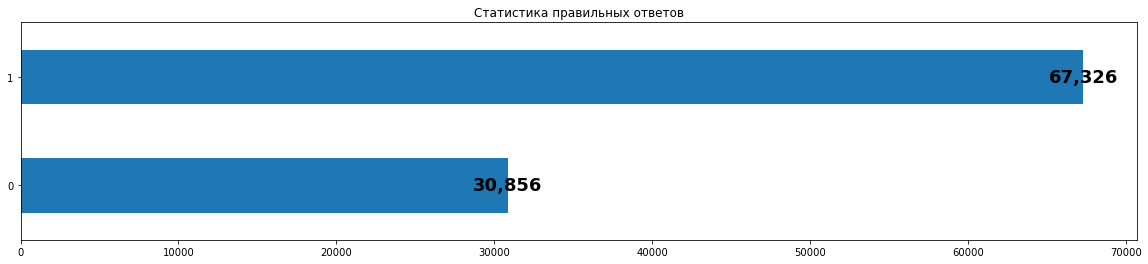

In [72]:
correct = train[train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(20,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='black', fontweight='bold', fontsize=18, ha='center', va='center')
plt.title("Статистика правильных ответов")
plt.xticks(rotation=0)
plt.show()

Загрузим данные по вопросам, выведем info по DataFrame

In [8]:
questions = pd.read_csv('data/questions.csv', sep=',',
                        dtype = {'question_id': 'int16', 'bundle_id': 'int16', 'correct_answer': 'int8',
                                 'part': 'int8', 'tags': 'object'
                               })
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


In [12]:
questions.head(10)#оценим результат загрузки

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


In [76]:
questions.shape #всего 13 523 строки (т.е. 13 523 вопроса) и 5 столбцов

(13523, 5)

Загурзим данные файла lectures. выведем info по DataFrame

In [9]:
lectures = pd.read_csv('data/lectures.csv', sep=',',
                      dtype = {'lecture_id': 'int16', 'tag': 'int16', 
                               'part': 'int8', 'type_of': 'object'})
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


In [11]:
lectures.head(10)#оценим результат загрузки

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


In [78]:
lectures.shape[0] #418 идентификаторов, т.е. 418 различных лекций

418